# Research Project (4-1)

There around 7 gb of x ray files which are to be classified to 14 different classes

which are result of a digonastic test where xray tells

which kind of desies he/she is diagnosed with.


In [3]:
## import libaries
import pandas as pd
import numpy as np
import cv2
import os, sys
from tqdm import tqdm

In [4]:
from __future__ import absolute_import, division, print_function
import numpy as np
import keras
from keras.datasets import cifar10, mnist
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Reshape
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
from seansUtils.research import StatsCallback, ModelSummary
import pickle
from matplotlib import pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (15, 8)

Using TensorFlow backend.


In [ ]:
#importing modules required

In [5]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

In [4]:
train = pd.read_csv('../train.csv')
test = pd.read_csv('../test.csv')

In [ ]:
#train.detected=train.detected.apply(lambda x:x[6:])

In [ ]:
#train.detected=train.detected.astype('int64')

In [5]:
# Hyper Parameters
TRAIN = False
BATCH_SIZE = 32
EPOCHS = 100

In [ ]:
df=train.sample(1000,random_state=2017)

In [ ]:
arr=np.unique(train.detected.values)

df=pd.DataFrame(data=None, columns=train.columns)

for i in arr:
    df=df.append(train.loc[train.detected==i].sample(100))

In [ ]:
df = shuffle(df)
y=df.detected
df.drop(['detected'],axis=1,inplace=True)

In [6]:
y=train.detected

In [7]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
encoder.fit(y)
encoded_Y = encoder.transform(y)

y = np_utils.to_categorical(encoded_Y)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(train, y, test_size=0.30, random_state=42)

In [11]:
num_class=y_train.shape[1]

In [12]:
def read_img(img_path):
    img = cv2.imread(img_path, cv2.IMREAD_COLOR)
    img = cv2.resize(img, (32,32))
    return img

In [13]:
TRAIN_PATH = '../train_/'
TEST_PATH = '../test_/'

In [14]:
# load data
train_img, test_img = [],[]
for img_path in tqdm(X_train['image_name'].values):
    train_img.append(read_img(TRAIN_PATH + img_path))

for img_path in tqdm(X_test['image_name'].values):
    test_img.append(read_img(TRAIN_PATH + img_path))

100%|██████████| 5574/5574 [02:51<00:00, 32.43it/s]


In [15]:
x_train = np.array(train_img, np.float32) / 255.
x_test=np.array(test_img, np.float32) / 255.

In [16]:
if TRAIN==False:
    model2=Sequential()
    model2.add(Convolution2D(128,3,3 ,input_shape=(32, 32, 3),border_mode='same'))
    model2.add(Activation('relu'))
    model2.add(MaxPooling2D(pool_size=[2,2]))
    model2.add(Convolution2D(256,3,3))
    model2.add(Activation('relu'))
    model2.add(MaxPooling2D(pool_size=[2,2]))
    #8x8x256
    model2.add(Convolution2D(512,3,3))
    model2.add(Activation('relu'))
    model2.add(MaxPooling2D(pool_size=[4,4]))
    model2.add(Flatten())
    ##4x4x512
    model2.add(Dense(14))
    model2.add(Activation('softmax'))
    model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    early_stopping = keras.callbacks.EarlyStopping(monitor='val_acc', patience=100, verbose=1, mode='auto')
    stats = StatsCallback('basic_cnn')
    callback_list = [stats, early_stopping]
        # Train the model2
    model2.fit(x_train, y_train, batch_size=BATCH_SIZE, nb_epoch=EPOCHS, 
              validation_data=(x_test, y_test), callbacks=callback_list)
    stats = stats.stats_dict
    pickle.dump(stats, open('../load/basic_cnn_stats.p', 'wb'))
    model2.save('../load/basic_cnn.h5')
else:
    print('Loading pretrained model...')
    stats = pickle.load(open('./load/basic_cnn_stats.p', 'rb'))
    model2 = keras.models.load_model('../load/basic_cnn.h5')
    print('Model Loaded.')

Train on 13003 samples, validate on 5574 samples
Epoch 1/100
13003/13003 [==============================] - 263s - loss: 2.2147 - acc: 0.3072 - val_loss: 2.2231 - val_acc: 0.2992

basic_cnn 
--------------------------

MODEL STATS 
------------
Accuracy:       0.344994617869
Loss:           2.02464448191
Parameters:     1486094
Training Time:  8:28:17.303310
Epoch Time:     0:05:24.612177


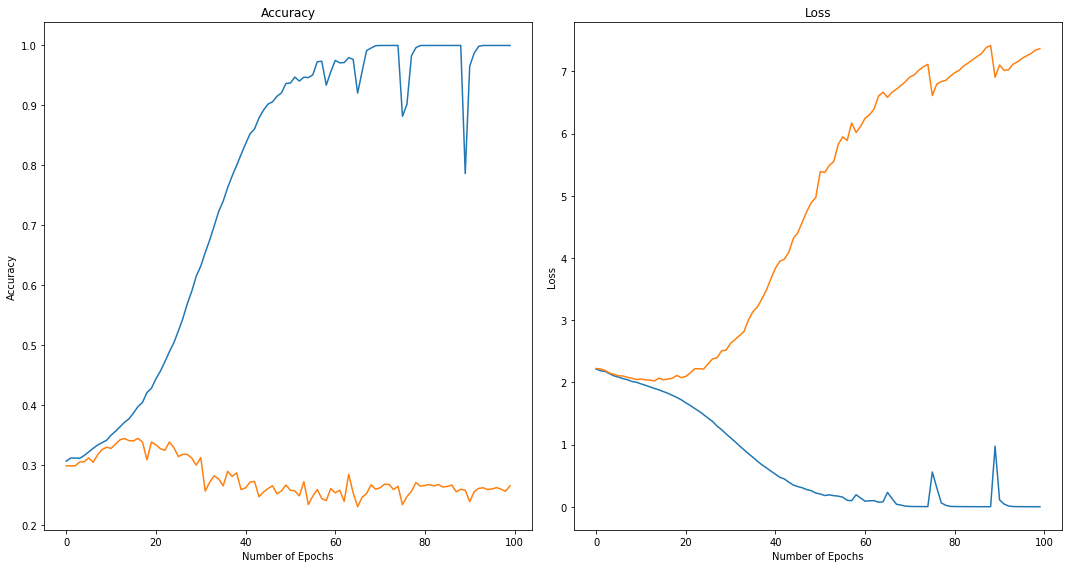

In [17]:
ModelSummary(model2, stats).show()

# network inference

From the above two plots we can infer different things lets focus on each carefully

1. Left plot represents Accuracy plot where we can see rise of curve(blue) which represents training accuracy to some point in model it learns from the images provided and after 30 epochs we can see the irregularity in learning which is caused because of overfitting.
2. If we compare both orange and blue curve on left plot we can say that there isn't much improvement of accuracy on test set ,this due to overfitting we can see decline in accuracy of orange curve(validation set)
3. Now on right plot blue curve we can see that loss for training set decrease as its learning from network and difference in two curve shows that this model is overfit

# Causes can be
1. small image size (32x32x3) can be improved for bigger size(256x256x3)
2. Accuracy dosent crosses 0.34 which can be caused due to network architecture(rebuild newtork use pre trained modles)
(we can use different optimizer for better performance)

In [7]:
print('Loading pretrained model...')
stats = pickle.load(open('../load/basic_cnn_stats.p', 'rb'))
model2 = keras.models.load_model('../load/basic_cnn.h5')
print('Model Loaded.')

Loading pretrained model...
Model Loaded.


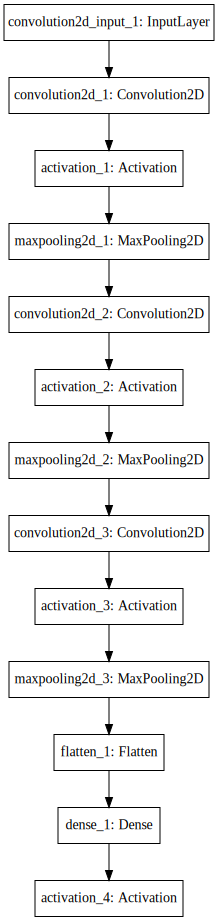

In [10]:
from IPython.display import SVG
from keras.utils.visualize_util import model_to_dot

SVG(model_to_dot(model2).create(prog='dot', format='svg'))

In [ ]:
y_hat = model2.predict_classes(x_test)


In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(y_hat,y_test)